In [20]:
## import packages
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer, random_center_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample, read_image
from pyclustering.utils.metric import distance_metric
from pyclustering.utils.metric import type_metric
from pyclustering.cluster.elbow import elbow
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import draw_image_mask_segments
from matplotlib import pyplot as plt
from PIL import Image
import cv2 as cv
import numpy as np
from fcmeans import FCM
from seaborn import scatterplot as scatter

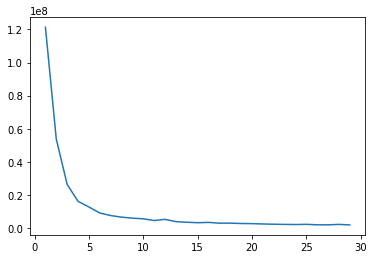

[121362258.73725916, 53694586.529821366, 26349519.465802833, 16120695.719193941, 12696079.787281878, 9060464.913149523, 7516318.580211025, 6562825.279386756, 5944858.785660649, 5545734.47038239, 4513194.214530582, 5202118.1748691555, 3847074.130822996, 3462834.3542024703, 3190164.3780469713, 3380089.982314404, 2910302.927405353, 2929964.3004673216, 2711288.6330333003, 2628884.549073079, 2425779.711546906, 2272125.2892796714, 2168585.845979182, 2085701.9426957897, 2205834.079581949, 1933915.994607965, 1890000.1820966054, 2171359.173573848, 1854268.7388992873]


In [2]:
## inja method e elbow ro ejra mikonim bbinim tedad cluster ha cheghadr bashe
sample = read_image('ci.jpg')
cluster_count = 7
kmin, kmax = 1, 30
elbow_instance = elbow(sample, kmin, kmax, initializer=random_center_initializer)
y = elbow_instance.process()
y = y.get_wce()
x = [i for i in range(1,30)]
plt.plot(x,y)
plt.show()
print(y)
# ba erfagh mitoonim begim '10' tedad cluster e monaseb hast

In [3]:
## inja kmeans ba pyclustering
# initial center haro moshakhas mikonim
initial_centers = kmeans_plusplus_initializer(sample, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

# ye instance az model kmeans dorost mikonim
kmeans_instance = kmeans(sample, initial_centers)

# process mikonim :
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

In [4]:
## inja cluster haye kmeans ro zakhire mikonim :
clusters = kmeans_instance.get_clusters()
kmeans_clusters = clusters

tedad e rang ha :
25


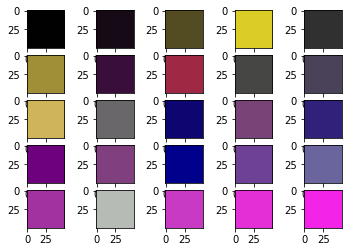

In [5]:
## ground truth :

gt = read_image('ci_gt.png')
t = list(set(map(tuple, gt)))
print('tedad e rang ha :')
print(len(t))
t.sort(key = lambda x: x[2])
images = []
for k in range(len(t)):
    image = np.zeros(7500, dtype = int).reshape(50, 50, 3)
    for i in range(50):
        for j in range(50):
            image[i][j] = t[k]
    images.append(image)
    
f, axarr = plt.subplots(5,5)

index = 0
for i in range(5):
    for j in range(5):
        axarr[i,j].imshow(images[index]);
        index += 1

In [6]:
## inja ground truth ro cluster mikonam
initial_centers = kmeans_plusplus_initializer(gt, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(gt, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
gt_clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

In [7]:
## inja har dotaro sort mikonim
kmeans_clusters.sort(key = lambda x: x[0])
gt_clusters.sort(key = lambda x: x[0])

# inaro mikonim np array :
kmeans_clusters = np.array(kmeans_clusters)
gt_clusters = np.array(gt_clusters)

In [8]:
## inja accuracy hessab mikonim:
## ye matrix mizarim vase inke score haro dashte bashim
cluster_accuracy = []

## cluster count inja 5 tast :
acc = 0
for i in range(4):
    
    for j in range(len(kmeans_clusters[i])):
        if kmeans_clusters[i][j] in gt_clusters[i]:
            acc += 1

print('Accuracy :')
print(acc / (65535 * 3) * 100)

Accuracy :
8.773937590600442


In [9]:
## inja ye image ba range cluster ha besaz :
# t rangamoon bood :
# size tasvir ham 65535 * 3 (255 * 257 * 3)
new_image = []
for k in range(65535):
    index_ = [(ix,iy) for ix, row in enumerate(kmeans_clusters) for iy, i in enumerate(row) if i == k]
    cluster_index = index_[0][0]
    color = t[cluster_index]
    color_array = []
    for j in range(3):
        color_array.append(color[j])
    new_image.append(color_array)

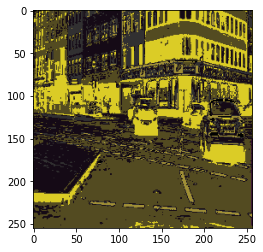

In [10]:
## inja reshapesh mikonim
## bad plotesh mikonim
new_image = np.reshape(new_image, (255, 257, 3))
plt.imshow(new_image)
plt.show()

In [13]:
## inja kmeans openCV
img = cv.imread('ci.jpg')
Z = img.reshape((-1,3))
# data type tasvir ro float mikonim
Z = np.float32(Z)
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv.kmeans(Z,cluster_count,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
## hala dobare int8 mikonim ke tasvir ro neshoon bedim :
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

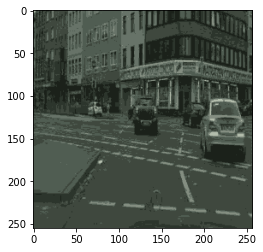

In [14]:
plt.imshow(res2)
plt.show()

In [24]:
# prepare input data and initial centers for cluster analysis using K-Means
# create metric that will be used for clustering
manhattan_metric = distance_metric(type_metric.MANHATTAN)
# create instance of K-Means using specific distance metric:
kmeans_instance = kmeans(sample, initial_centers)
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

In [17]:
# fcm
initial_centers = kmeans_plusplus_initializer(sample, cluster_count, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
# ye instance fcm dorost mikonim :
fcm_instance = fcm(sample, initial_centers)
# run cluster analysis and obtain results
fcm_instance.process()
fcm_clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()

In [18]:
new_image_fcm = []
for k in range(65535):
    index_ = [(ix,iy) for ix, row in enumerate(fcm_clusters) for iy, i in enumerate(row) if i == k]
    cluster_index = index_[0][0]
    color = t[cluster_index]
    color_array = []
    for j in range(3):
        color_array.append(color[j])
    new_image_fcm.append(color_array)

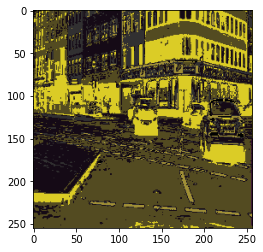

In [19]:
new_image = np.reshape(new_image, (255, 257, 3))
plt.imshow(new_image)
plt.show()

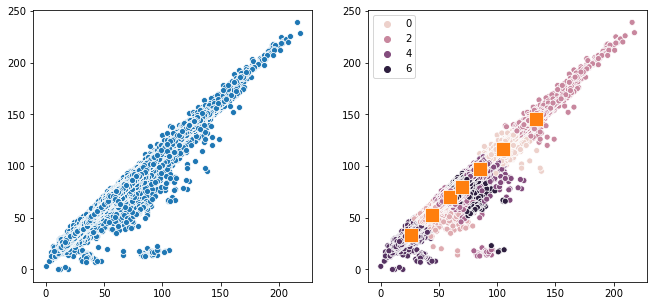

In [23]:
## fcm fuzzy-c-means
sample = np.array(sample)

# fit the fuzzy-c-means
fcm = FCM(n_clusters = cluster_count)
fcm.fit(sample)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis = 1)

X = sample
# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,1], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
plt.show()

In [28]:
fcm_labels = np.array(fcm_labels).reshape(255, 257)

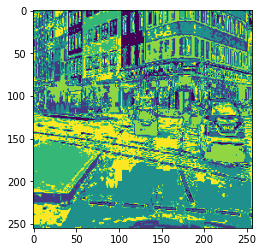

In [30]:
plt.imshow(fcm_labels)
plt.show()